# Moore-Penrose pseudo inverse


In [4]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

Write a function computing the Moore-Penrose pseudo inverse, exploiting the full SVD.


In [5]:
def my_pinv_fullSVD(A):
    U, s, VT = np.linalg.svd(A)
    s[s > 0] = 1 / s[s > 0]
    sigma_plus = la.diagsvd(s, A.shape[1], A.shape[0])
    return VT.T @ sigma_plus @ U.T

Write now a function computing the Moore-Penrose pseudo inverse, exploiting the reduced SVD.


In [6]:
def my_pinv_thinSVD(A):
    U, s, VT = np.linalg.svd(A, full_matrices=False)
    s[s > 0] = 1 / s[s > 0]
    sigma_plus = np.diag(s)
    return VT.T @ sigma_plus @ U.T

Generate a random matrix $A$ (with elements sampled from a standard Gaussian distribution) with 5 rows and 4 columns. Compute its Moore-Penrose pseudo inverse thorugh the two functions above defined, and compare the result with the function `numpy.linalg.pinv` (see [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html)).


In [7]:
A = np.random.randn(5, 4)
pinv1 = my_pinv_fullSVD(A)
pinv2 = my_pinv_thinSVD(A)
pinv_np = np.linalg.pinv(A)

print(f"Difference between pinv1 and pinv2:{np.linalg.norm(pinv1 - pinv2)}")
print(f"Difference between pinv1 and pinv_np: {np.linalg.norm(pinv1 - pinv_np)}")
print(f"Difference between pinv2 and pinv_np: {np.linalg.norm(pinv2 - pinv_np)}")

Difference between pinv1 and pinv2:0.0
Difference between pinv1 and pinv_np: 1.2360437345401404e-16
Difference between pinv2 and pinv_np: 1.2360437345401404e-16


Compare the three implementations performances through the Google Colab magic command `%timeit`.


In [8]:
%timeit np.linalg.pinv(A)

18.1 μs ± 288 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%timeit my_pinv_fullSVD(A)

17.3 μs ± 381 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
%timeit my_pinv_thinSVD(A)

15 μs ± 130 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Least-square regression


Consider the linear model

$$
y = mx + q.
$$

where $m = 2$ and $q = 3$.

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 2$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane, together with the line $y = mx + q$.


In [11]:
m = 2.0
q = 3.0
N = 100
noise = 2.0

X = np.random.randn(N)
Y = m * X + q + noise * np.random.randn(N)

Using the previously implemented functions to compute the Moore-Penrose pseudo inverse, solve the least-squares problem

$$
\min_{m,q} \sum_{i=1}^N (\tilde{y}_i - (m x_i + q))^2
$$

and display the regression line superimposed to the noisy data and the exact model.


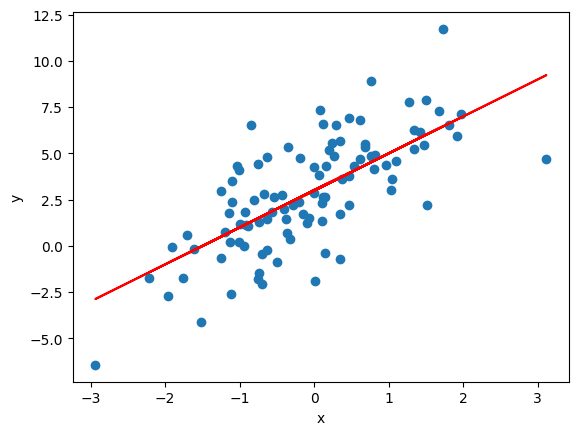

In [12]:
plt.scatter(X, Y)
plt.plot(X, m * X + q, "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [13]:
phi = np.block([X[:, None], np.ones((N, 1))])
z = my_pinv_thinSVD(phi) @ Y

m_hat = z[0]
q_hat = z[1]

print(f"m = {m}, m_hat = {m_hat}")
print(f"q = {q}, q_hat = {q_hat}")

m = 2.0, m_hat = 2.094902115395181
q = 3.0, q_hat = 3.025274424399002


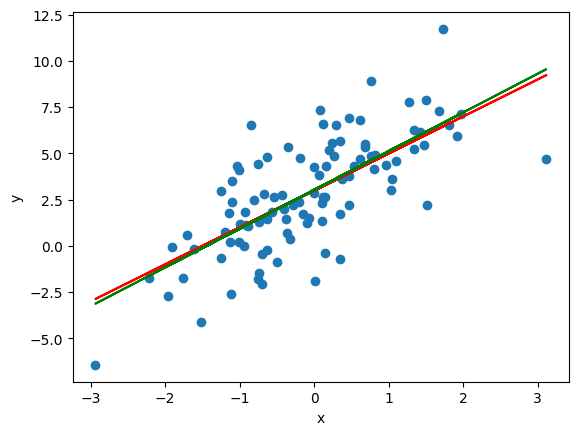

In [14]:
plt.scatter(X, Y)
plt.plot(X, m * X + q, "r")
plt.plot(X, m_hat * X + q_hat, "g")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Repeat the excercise by solving the normal equations. Compare the results


In [15]:
z2 = np.linalg.solve(phi.transpose() @ phi, phi.transpose() @ Y)
np.linalg.norm(z2 - z)

np.float64(4.440892098500626e-16)

# Ridge regression and Kernel regression


Consider the function

$$
y = f(x) = \tanh(2x - 1).
$$

Generate $N = 100$ points $x_i$, sampling from a standard Gaussian distribution, and the associated $y_i$. Then, add a synthetic noise ($\epsilon_i$) by sampling from a Gaussian distribution with zero mean and standard deviation $\sigma = 0.1$. Plot the noisy data $(x_i, \tilde{y}_i)$, where $\tilde{y}_i = y_i + \epsilon_i$, in the $(x,y)$ plane.

Then, generate 1000 testing points, uniformly distributed in the interval $[-3,3]$, and display the function $y = f(x)$ in correspondence of the testing points.


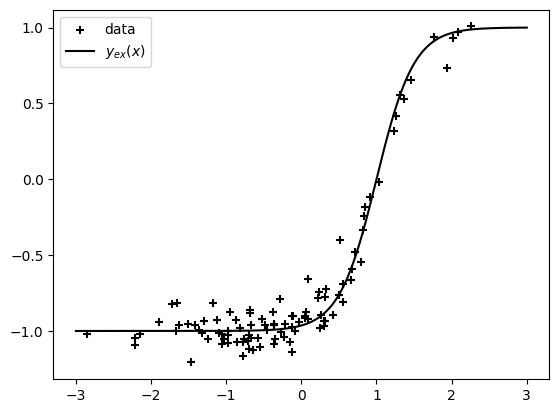

In [16]:
N = 100
noise = 0.1
y_ex = lambda x: np.tanh(2 * (x - 1))

X = np.random.randn(N)
Y = y_ex(X) + noise * np.random.randn(N)

N_test = 1000
X_test = np.linspace(-3, 3, N_test)
Y_test_ex = y_ex(X_test)

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.legend()

Proceeding as in the previous exercise, compute the regression line resulting from the **least squares regression** of data $(x_i, \tilde{y}_i)$. Plot the resulting regression line.


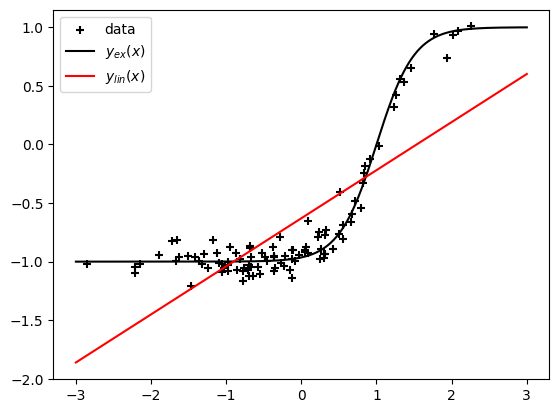

In [17]:
import numpy as np

phi = np.block([X[:, None], np.ones((N, 1))])
z = my_pinv_thinSVD(phi) @ Y

m, q = z

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, m * X_test + q, color="red", label="$y_{lin}(x)$")
plt.legend()

Let us now consider **ridge regression**, corresponding to a regularizaton parameter $\lambda = 1.0$. Compare the obtained regression line with the one obtained through least squares regression.


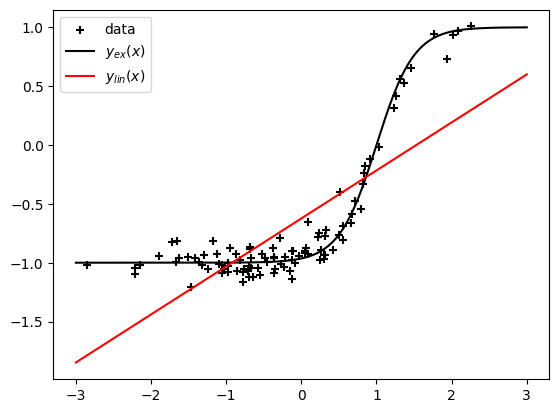

In [18]:
reg_param = 1

phi = np.block([X[:, None], np.ones((N, 1))])
z = np.linalg.solve(phi.transpose() @ phi + reg_param * np.eye(2), phi.transpose() @ Y)
phi_test = np.block([X_test[:, None], np.ones((N_test, 1))])
Y_test_RR = phi_test @ z

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_test_RR, color="red", label="$y_{lin}(x)$")
plt.legend()

Consider now **kernel regression**.

1. Consider first the scalar product kernel
   $$K(x_i,x_j) = x_i x_j + 1.$$
   Compute the regression function and compare the result with the ones obtained at the previous point. How do the results compare?

2. Consider then the higher-order scalar product kernel, for $q > 1$.
   $$K(x_i,x_j) = (x_i x_j + 1)^q.$$

3. Consider finally a Gaussian kernel, for $\sigma > 0$.
   $$K(x_i,x_j) = \exp\left(-\frac{(x_i - x_j)^2}{2 \sigma^2}\right).$$


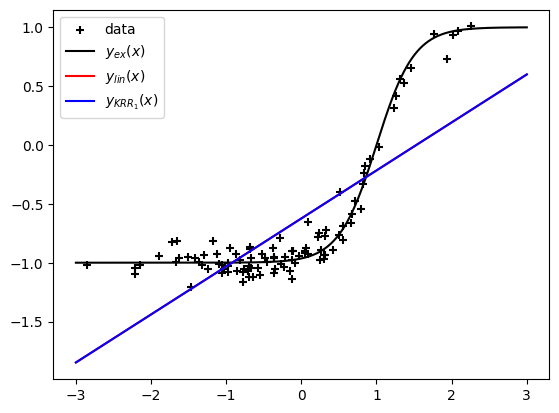

In [19]:
y_ex = lambda x: np.tanh(2 * (x - 1))
sigma = 1
kernel_1 = lambda xi, xj: xi * xj + 1

K = np.array([[kernel_1(xi, xj) for xj in X] for xi in X])
alpha = np.linalg.solve(K + reg_param * np.eye(N), Y)

K_test = np.array([[kernel_1(xi, xj) for xj in X] for xi in X_test])
Y_test_KRR_k1 = K_test @ alpha

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_test_RR, color="red", label="$y_{lin}(x)$")
plt.plot(X_test, Y_test_KRR_k1, color="blue", label="$y_{KRR_1}(x)$")
plt.legend()

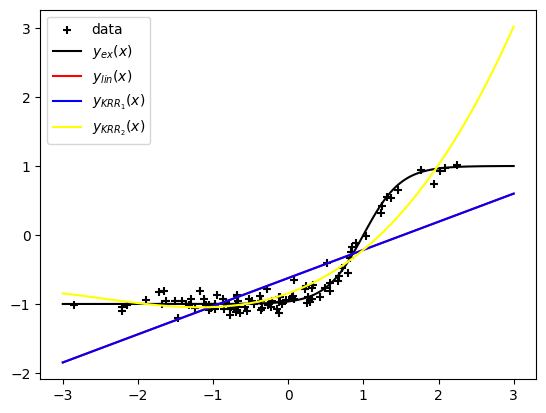

In [20]:
y_ex = lambda x: np.tanh(2 * (x - 1))
q = 3
kernel_2 = lambda xi, xj: (xi * xj + 1) ** q

K = np.array([[kernel_2(xi, xj) for xj in X] for xi in X])
alpha = np.linalg.solve(K + reg_param * np.eye(N), Y)

K_test = np.array([[kernel_2(xi, xj) for xj in X] for xi in X_test])
Y_test_KRR_k2 = K_test @ alpha

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_test_RR, color="red", label="$y_{lin}(x)$")
plt.plot(X_test, Y_test_KRR_k1, color="blue", label="$y_{KRR_1}(x)$")
plt.plot(X_test, Y_test_KRR_k2, color="yellow", label="$y_{KRR_2}(x)$")
plt.legend()

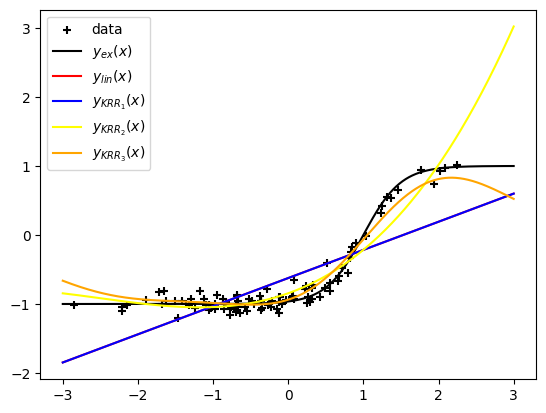

In [21]:
y_ex = lambda x: np.tanh(2 * (x - 1))
sigma = 1
kernel_3 = lambda xi, xj: np.exp(-((xi - xj) ** 2) / (2 * sigma**2))

K = np.array([[kernel_3(xi, xj) for xj in X] for xi in X])
alpha = np.linalg.solve(K + reg_param * np.eye(N), Y)

K_test = np.array([[kernel_3(xi, xj) for xj in X] for xi in X_test])
Y_test_KRR_k3 = K_test @ alpha

plt.scatter(X, Y, marker="+", color="black", label="data")
plt.plot(X_test, Y_test_ex, color="black", label="$y_{ex}(x)$")
plt.plot(X_test, Y_test_RR, color="red", label="$y_{lin}(x)$")
plt.plot(X_test, Y_test_KRR_k1, color="blue", label="$y_{KRR_1}(x)$")
plt.plot(X_test, Y_test_KRR_k2, color="yellow", label="$y_{KRR_2}(x)$")
plt.plot(X_test, Y_test_KRR_k3, color="orange", label="$y_{KRR_3}(x)$")
plt.legend()